In [12]:
import pandas as pd
import numpy as np
import PIL.Image as pilimg
import matplotlib.pyplot as plt
import statsmodels.api as sm

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


## 데이터 설명
#### id : data id

#### digit : hidden num

#### letter : alpabet which hide num

#### 0~783 : 28*28 pixel val

In [13]:
#데이터 불러오기 
train_df = pd.read_csv("train.csv")

In [14]:
test_df = pd.read_csv("test.csv")

In [ ]:
test_df

In [ ]:
#데이터 봐보기
train_df

In [ ]:
# 이미지 봐보기
## ㅣ 뒤에 숫자 5가 숨어있다.

#ARRAY 화
array_0 =np.array(train_df.loc[0])[3:]
#자료형 변경
array_0= array_0.astype(int)
#28*28 배열 변경
array_0 =array_0.reshape(28,28)
pix = array_0
plt.imshow(pix)

## 분석 시작

In [ ]:
#목표 문자 뒤에 있는 숫자를 맞춰보자!
#첫번째 가정
#문자 마다 공통적으로 존재하는 데이터가 존재할것이다
##공통적으로 존재하는 데이터를 제거하고 숫자를 맞춰보자

#알고리즘 구조
## 1.문자 종류에 따라 문자를 묶어준다.
## 2.문자 마다 공통적으로 존재하는 feature을 찾아준다.
## 3.공통적으로 존재하는 feature를 제거한 후 남은 데이터 기반으로 숫자를 예측하는 모델을 학습 시킨다.

In [ ]:
#알파벳 별로 몇개 있는지 체크
train_df.groupby(train_df["letter"]).size()

In [ ]:
# 자동으로 어떻게 넣을까 생각해보기
letter_Data =dict(list(train_df.groupby("letter")))
data= list(letter_Data.keys())
np.array(data)
for i in data:
    i = pd.DataFrame(letter_Data[i])
# A 부터 체크해보기
A =letter_Data["A"]
# id,digit- 숫자는 일단 제거
A = A.drop(['id'],axis=1)
A_train_y = A["digit"]
A_train_X = A.drop(["digit","letter"],axis=1)

letter_Data_t =dict(list(test_df.groupby("letter")))
data= list(letter_Data.keys())
np.array(data)
for i in data:
    i = pd.DataFrame(letter_Data[i])

A_t = letter_Data_t["A"]
letter = letter_Data_t["A"]["letter"]
letter =pd.DataFrame(letter)

A_t =A_t.drop(["id","letter"],axis=1)

rfc = RandomForestClassifier(n_estimators=100, criterion = "entropy")

rfc.fit(A_train_X, A_train_y)
prediction = rfc.predict(A_t)


A_t["digit"]= prediction 

A = pd.concat([A_t,letter],axis=1)
A

In [ ]:
# 자동으로 어떻게 넣을까 생각해보기
letter_Data =dict(list(train_df.groupby("letter")))
data= list(letter_Data.keys())
np.array(data)
for i in data:
    i = pd.DataFrame(letter_Data[i])
# A 부터 체크해보기


A =letter_Data["A"]
# id,digit- 숫자는 일단 제거
A = A.drop(['id'],axis=1)
A_train_y = A["digit"]
A_train_X = A.drop(["digit","letter"],axis=1)

letter_Data_t =dict(list(test_df.groupby("letter")))
data= list(letter_Data.keys())
np.array(data)
for i in data:
    i = pd.DataFrame(letter_Data[i])

A_t = letter_Data_t["A"]
letter = letter_Data_t["A"]["letter"]
letter =pd.DataFrame(letter)

A_t =A_t.drop(["id","letter"],axis=1)

rfc = RandomForestClassifier(n_estimators=100, criterion = "entropy")

rfc.fit(A_train_X, A_train_y)
prediction = rfc.predict(A_t)


A_t["digit"]= prediction 

A = pd.concat([A_t,letter],axis=1)
A

In [ ]:
y = train_df["digit"]

In [ ]:
X = train_df.drop(["digit","id","letter"],axis =1)

In [ ]:
X


In [ ]:
test_df

In [ ]:
test_df = test_df.drop(["id","letter"],axis=1)

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, criterion = "entropy")

rfc.fit(X, y)
prediction = rfc.predict(test_df)



In [ ]:
prediction

In [ ]:
summit =pd.read_csv("submission.csv")

In [ ]:
summit["digit"] = prediction

In [ ]:
summit.to_csv("submission.csv")

In [ ]:
#데이터 수를 늘려볼까 트레인!
## 좌우반전 , 상하 반전 ,상하 좌우 반전 

In [15]:
train_df = pd.read_csv("train.csv")
train_df

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,6,V,2,4,3,4,2,4,4,...,0,2,2,0,0,1,3,1,4,0
2044,2045,1,L,3,2,2,1,1,4,0,...,2,3,4,2,1,2,3,4,1,1
2045,2046,9,A,4,0,4,0,2,4,4,...,2,3,1,1,3,4,2,2,0,0
2046,2047,0,Z,2,3,3,0,3,0,4,...,2,3,1,1,0,4,1,4,3,1


In [68]:
img_train = train_df.drop(["digit","letter","id"],axis=1)

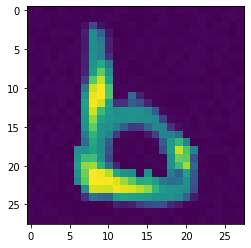

In [19]:
first_data = np.array(img_train.loc[1])
first_data= first_data.astype(int)
first_data =first_data.reshape(28,28)
plt.imshow(first_data)

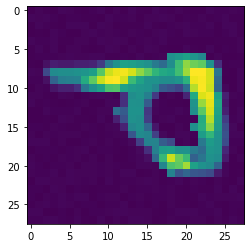

In [75]:
first_data = np.array(img_train.loc[1])
first_data= first_data.astype(int)
first_data =first_data.reshape(28,28)
# first_data =np.transpose(first_data)
first_data=first_data.T
plt.imshow(first_data)

In [76]:
img_train = train_df.drop(["digit","letter","id"],axis=1)